# Data wrangling and EDA

Data taken from https://www.kaggle.com/datasets/rtatman/world-atlas-of-language-structures which gets data from https://wals.info/

In [1]:
# Import the necessary libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the data 
raw_language = pd.read_csv('../data/raw/language.csv')
raw_wals = pd.read_csv('../data/raw/wals-data.csv')

In [3]:
raw_language.shape

(2679, 202)

In [4]:
raw_language.sample(5)

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives
1330,lmg,hia,lama1288,Lamang,11.250000,13.583333,Biu-Mandara,Afro-Asiatic,Africa,NG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,hsl,has,hais1244,Haisla,54.000000,-128.750000,Northern Wakashan,Wakashan,North America,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,kow,kst,winy1241,Ko (Winye),11.866667,-2.916667,Gur,Niger-Congo,Africa,BF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,ale,ale,aleu1260,Aleut,54.000000,-166.000000,Aleut,Eskimo-Aleut,North America,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1284,lar,lrg,lara1258,Laragia,-12.666667,130.833333,Laragia,Darwin Region,Australia,AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
raw_language[raw_language.wals_code =='eng'].countrycodes

650    GB IE
Name: countrycodes, dtype: object

Are all the identifiers unique? 

In [23]:
raw_language[['wals_code','Name','iso_code', 'glottocode']].nunique()

wals_code     2678
Name          2679
iso_code      2418
glottocode    2462
dtype: int64

<AxesSubplot:>

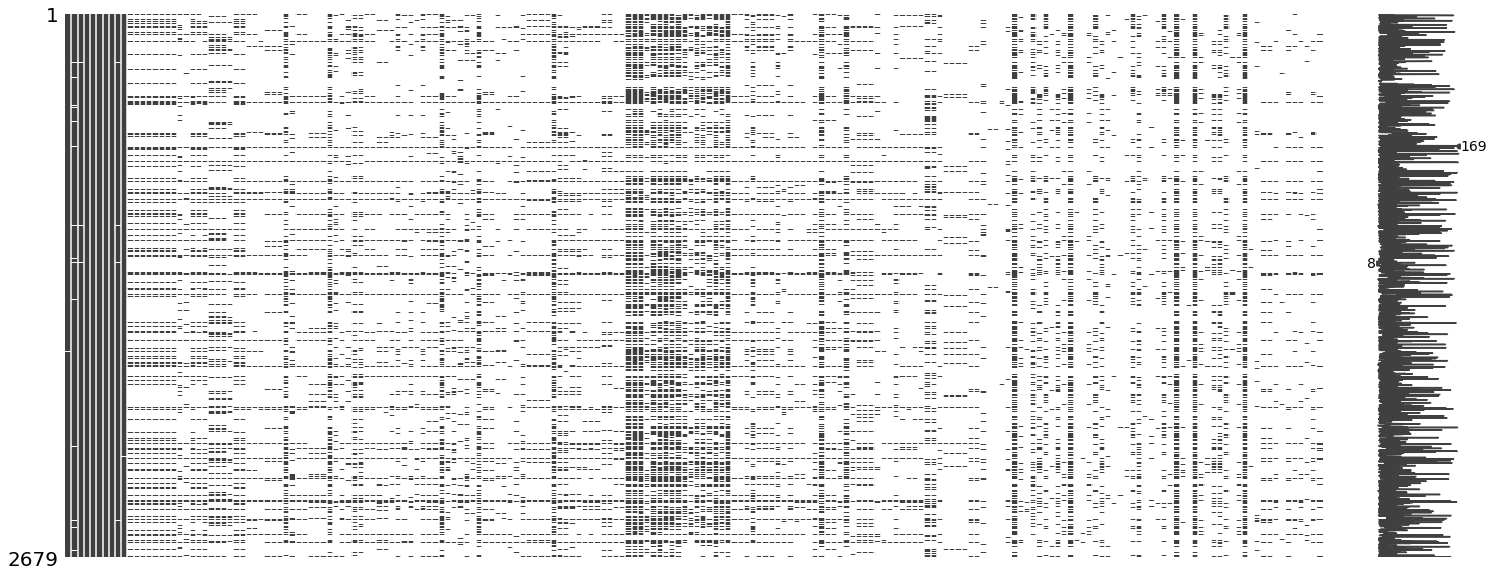

In [24]:
msno.matrix(raw_language)

<AxesSubplot:>

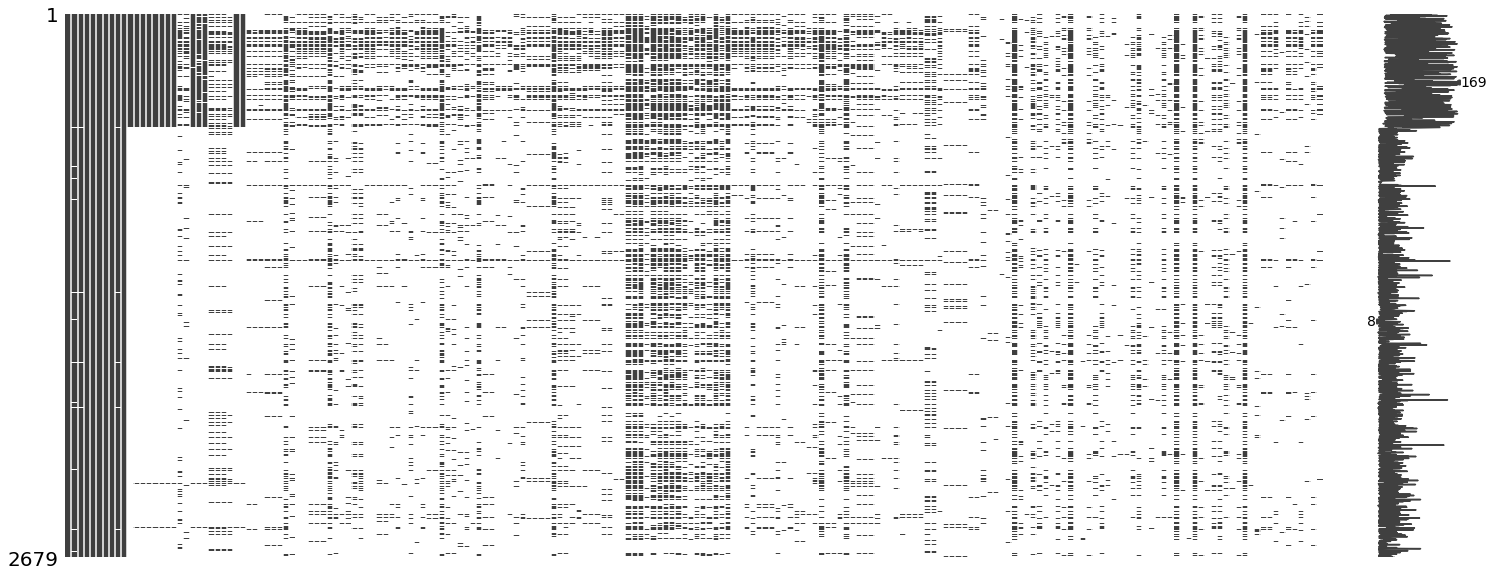

In [28]:
msno.matrix(raw_language.sort_values('1A Consonant Inventories'))

In [15]:
raw_language[raw_language['wals_code'].duplicated()]

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives


Since the duplicate iso code will not be useful in telling us anything about the language, I  will be deleting that column. 

In [26]:
raw_language.drop('iso_code', axis=1, inplace=True)

In [ ]:
raw_language